In [113]:
import pandas as pd
import plotly.express as px 
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
raw_df=pd.read_csv('../data/processed/datset_cleaned.csv')
raw_df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df=raw_df.copy()
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,killed_by,notes,year,month,month_name
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces,Fatally shot by Israeli forces while standing ...,2023,9,September
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,Israeli security forces,Fatally shot by Israeli forces while trying to...,2023,9,September
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,Unknown,al-Yamun,Jenin,gunfire,Israeli security forces,Fatally shot by soldiers while firing at them ...,2023,9,September
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,Unknown,'Aqbat Jaber R.C.,Jericho,gunfire,Israeli security forces,Shot in the head by Israeli forces while throw...,2023,9,September
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,Unknown,Jenin,Jenin,gunfire,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,2023,9,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,Binyamin Herling,2000-10-19,64,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,Palestinian civilians,Killed while hiking on Mt. Eival.,2000,10,October
10929,Farid Musa 'Issa a-Nesasreh,2000-10-17,28,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,Israeli civilians,Killed by a settler from Itamar while harvesti...,2000,10,October
10930,Hillel Lieberman,2000-10-07,36,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,Palestinian civilians,His body was found a day after he disappeared.,2000,10,October
10931,Fahed Mustafa 'Odeh Baker,2000-10-07,21,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,Israeli civilians,Killed by settlers who rioted in Biddya village.,2000,10,October


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   name                          10933 non-null  object
 1   date_of_event                 10933 non-null  object
 2   age                           10933 non-null  int64 
 3   citizenship                   10933 non-null  object
 4   event_location                10933 non-null  object
 5   event_location_district       10933 non-null  object
 6   event_location_region         10933 non-null  object
 7   date_of_death                 10933 non-null  object
 8   gender                        10933 non-null  object
 9   took_part_in_the_hostilities  10933 non-null  object
 10  place_of_residence            10933 non-null  object
 11  place_of_residence_district   10933 non-null  object
 12  type_of_injury                10933 non-null  object
 13  killed_by       

In [116]:
df.citizenship.value_counts().reset_index()


,citizenship,count
0,Palestinian,9933
1,Israeli,997
2,Jordanian,2
3,American,1


In [117]:
px.histogram(df.citizenship.value_counts().reset_index(),x='citizenship',y='count',title='Total number of deaths by nationality')

In [118]:
df.type_of_injury.value_counts()

type_of_injury
gunfire                         9688
explosion                        545
shelling                         310
Unknown                          279
stabbing                          46
house demolition                  24
hit by a vehicle                  15
beating                            9
stones throwing                    5
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: count, dtype: int64

In [119]:
px.pie(names=df.type_of_injury.value_counts().index,values=df.type_of_injury.value_counts().values)

In [152]:
df.type_of_injury.value_counts().reset_index()

,type_of_injury,count
0,gunfire,9688
1,explosion,545
2,shelling,310
3,Unknown,279
4,stabbing,46
5,house demolition,24
6,hit by a vehicle,15
7,beating,9
8,stones throwing,5
9,being bludgeoned with an axe,4


In [159]:
px.pie(names=df.type_of_injury.value_counts().index,values=df.type_of_injury.value_counts().values,title='Types Of Injury ')

([<matplotlib.patches.Wedge at 0x26e89123cd0>,
 [Text(0.6372505301450591, -0.8966112657277073, 'Gun fire'),
  Text(-0.5518282770167834, 0.9515700461262367, 'Explosion'),
  Text(-0.773834959389593, 0.7817796720473787, 'Shelling')],
 [Text(0.34759119826094126, -0.48906069039693123, '91.9%'),
  Text(-0.3009972420091545, 0.5190382069779472, '5.2%'),
  Text(-0.422091796030687, 0.42642527566220656, '2.9%')])

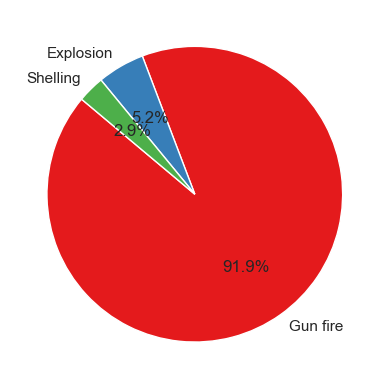

In [151]:
plt.pie(df.type_of_injury.value_counts().head(3), labels=['Gun fire', 'Explosion', 'Shelling'], autopct='%1.1f%%', startangle=140)

In [122]:
kill_df=df.killed_by.value_counts().reset_index()
kill_df

,killed_by,count
0,Israeli security forces,9846
1,Palestinian civilians,996
2,Israeli civilians,91


In [163]:
px.pie(names=df.killed_by.value_counts().index,values=df.killed_by.value_counts().values,title=f'Killed By Israeli security forces Vs. Palestinian civilians Vs. Israeli civilians')

In [164]:
df.age.describe()

count    10933.000000
mean        26.734657
std         13.780090
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

In [177]:
df.groupby(['event_location_region','year']).age.count().reset_index()

,event_location_region,year,age
0,Gaza Strip,2000,13
1,Gaza Strip,2001,66
2,Gaza Strip,2002,386
3,Gaza Strip,2003,383
4,Gaza Strip,2004,654
...,...,...,...
67,West Bank,2019,32
68,West Bank,2020,25
69,West Bank,2021,82
70,West Bank,2022,157


In [178]:
px.line(df.groupby(['event_location_region','year']).age.mean().reset_index(),x='year',y='age',color='event_location_region')

In [193]:
df.groupby(['gender','year']).age.count().reset_index()

,gender,count
0,M,9548
1,F,1385


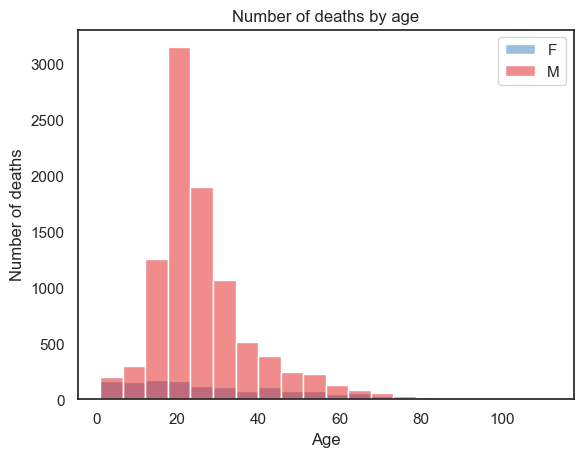

In [263]:
sns.set(style="white", palette="Set1")

sns.histplot(data=df, x='age', hue='gender',bins=20)

plt.title("Number of deaths by age")
plt.xlabel("Age")
plt.ylabel("Number of deaths")
plt.legend(['F', 'M'])

plt.show()

In [203]:
px.bar(df.age.value_counts().reset_index(),x='age',y='count',title='Total number of deaths with age')

In [248]:
(df.age>=18).value_counts().reset_index()

,age,count
0,True,8702
1,False,2231


In [233]:
df[df.event_location_region=='West Bank'].year.value_counts().reset_index().sort_values('year')

,year,count
22,2000,16
4,2001,176
0,2002,652
1,2003,229
3,2004,203
9,2005,95
7,2006,139
10,2007,86
13,2008,51
19,2009,25


In [235]:
px.bar(df[df.event_location_region=='West Bank'].year.value_counts().reset_index().sort_values('year'), x='year',y='count')

In [249]:
df.event_location_region.value_counts().reset_index()


,event_location_region,count
0,Gaza Strip,7638
1,West Bank,2634
2,Israel,661


In [237]:
df.groupby(['event_location_region','year']).name.count().reset_index()

,event_location_region,year,name
0,Gaza Strip,2000,13
1,Gaza Strip,2001,66
2,Gaza Strip,2002,386
3,Gaza Strip,2003,383
4,Gaza Strip,2004,654
...,...,...,...
67,West Bank,2019,32
68,West Bank,2020,25
69,West Bank,2021,82
70,West Bank,2022,157


<Axes: xlabel='event_location_region'>

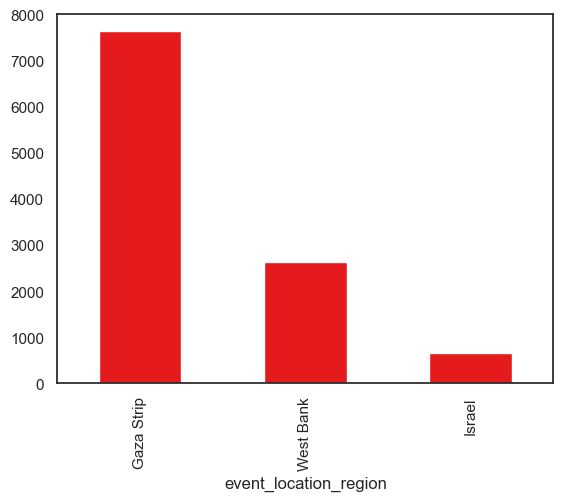

In [238]:
df['event_location_region'].value_counts().plot(kind='bar')


In [239]:
px.line(df.groupby(['event_location_region','year']).name.count().reset_index(),x='year',y='name',color='event_location_region',title='Number of people death in this years')

In [240]:
px.pie(names=df.event_location_region.value_counts().index,values=df.event_location_region.value_counts().values,title='Percentage in each sector')

<Axes: ylabel='place_of_residence'>

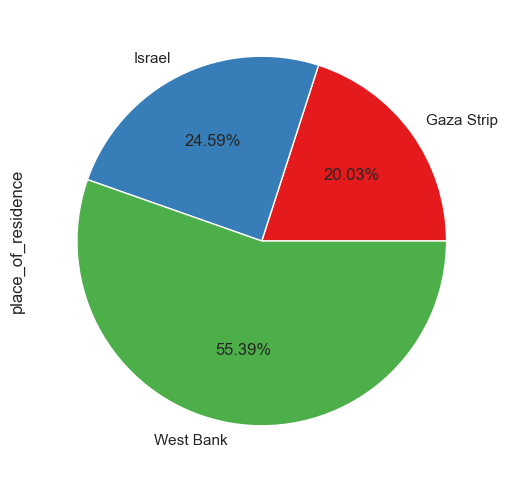

In [269]:
plt.figure(figsize=(6,6))
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie',autopct='%.2f%%')

In [258]:
df.took_part_in_the_hostilities.value_counts().reset_index()

,took_part_in_the_hostilities,count
0,No,4584
1,Yes,3421
2,Unknown,1981
3,Israelis,748
4,Object of targeted killing,199


In [173]:
hostilities_counts=df[df['took_part_in_the_hostilities']=="Yes"]["citizenship"].value_counts().reset_index()
hostilities_counts

,citizenship,count
0,Palestinian,3420
1,Israeli,1


In [174]:
no_hostilities_counts=df[df['took_part_in_the_hostilities']=="No"]["citizenship"].value_counts().reset_index()
no_hostilities_counts

,citizenship,count
0,Palestinian,4583
1,Jordanian,1


<Axes: ylabel='count'>

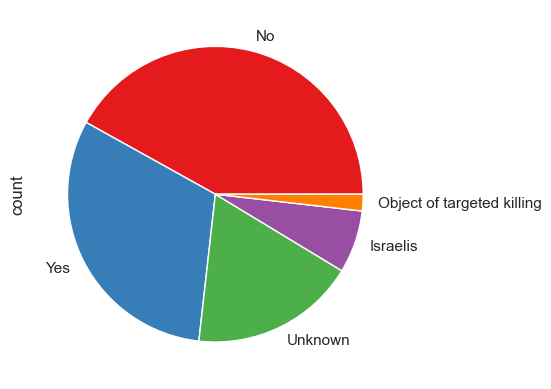

In [257]:
df['took_part_in_the_hostilities'].value_counts().plot(kind='pie')

In [175]:
px.histogram(df.took_part_in_the_hostilities.value_counts().reset_index(), x='took_part_in_the_hostilities', y='count')

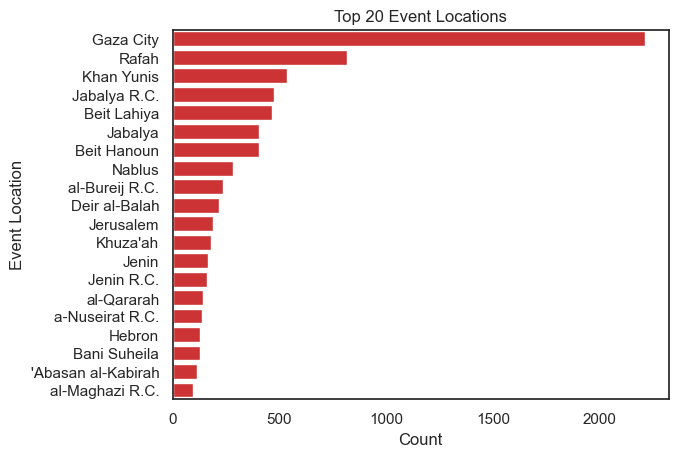

In [302]:
sns.barplot(x=df['event_location'].value_counts().values[0:20],
            y=df['event_location'].value_counts().index[0:20])

plt.xlabel('Count')
plt.ylabel('Event Location')
plt.title('Top 20 Event Locations')

plt.show()

<Axes: xlabel='gender'>

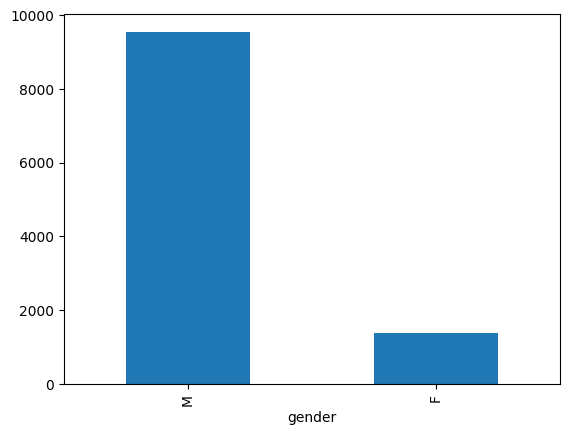

In [ ]:
df['gender'].value_counts().plot(kind='bar')


In [265]:
df.groupby('event_location_region')['place_of_residence'].nunique().reset_index()

,event_location_region,place_of_residence
0,Gaza Strip,145
1,Israel,178
2,West Bank,401


In [266]:
df.place_of_residence.value_counts().reset_index()

,place_of_residence,count
0,Gaza city,2262
1,Rafah,878
2,Khan Yunis,714
3,Jabalya R.C.,563
4,Beit Lahiya,473
...,...,...
573,al-'Auja,1
574,Sheqef,1
575,Rakhme,1
576,Kafr Qadum,1


In [ ]:
df.event_location_district.value_counts().reset_index()

,event_location_district,count
0,Gaza,2411
1,North Gaza,1884
2,Khan Yunis,1383
3,Rafah,1049
4,Deir al-Balah,840
5,Israel,661
6,Nablus,630
7,Jenin,500
8,Ramallah and al-Bira,337
9,Hebron,336


In [312]:
df.event_location_district.value_counts().reset_index().head(5)

,event_location_district,count
0,Gaza,2411
1,North Gaza,1884
2,Khan Yunis,1383
3,Rafah,1049
4,Deir al-Balah,840


In [303]:
px.funnel(df.event_location_district.value_counts().reset_index(),y='event_location_district' ,x='count',title='Number of people is killed in location district')

In [ ]:
age_va=df.age.value_counts().reset_index()
age_va

,age,count
0,22,627
1,21,608
2,20,585
3,23,575
4,19,530
...,...,...
90,112,1
91,91,1
92,89,1
93,92,1


In [ ]:
df.age.mean()

26.734656544406842

In [318]:
df.groupby(['year','age']).age.value_counts().reset_index()

,year,age,count
0,2000,18,2
1,2000,19,2
2,2000,21,5
3,2000,24,1
4,2000,25,4
...,...,...,...
1218,2023,64,2
1219,2023,66,1
1220,2023,68,1
1221,2023,71,1


In [320]:
px.histogram(df.groupby(['year','age']).age.value_counts().reset_index(), x='year',y='age')


In [ ]:
df.age.max() ,df.age.min()

(112, 1)

In [ ]:
px.histogram(age_va,x='age', y='count')